In [395]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from numpy.linalg import inv

In [396]:
# This function implements the OLS estimator which takes in 1D features, x, expected values y as inputs, and returns two parameters
def ols_estimator_1d(x, y):
    
    m = x.shape[0] # Number of training examples
    
    # Dependent variable (1D) - X matrix
    X = np.array([np.ones(m), x]) 
    X = X.T # Transpose matrix to hold a shape of m x 2 to facilitate matrix multiplication of its transpose with vector y of shape m x 1 


    # Independent variable - y vector
    Y = y[..., None]

    # Implementing OLS Estimator
    # 1D OLS parameters - [\beta_{0}, \beta_{1}], y-intercept and gradient respectively
    betas = np.linalg.inv(X.T @ X) @ X.T @ Y 

    betas = betas.flatten()
    
    return betas

def regression_formula(x, beta1, beta2):
    return beta1 + beta2 * x
    

In [397]:
random.seed(10)
np.random.seed(10)


a = 2
b = -3

# Creates 100 datasets, with 10 data points each
# m = 100 # Number of datasets
n = 50 # training examples 

mean = 0
var = 0.1 

def generate_one_dataset(n, mean, var):
    # Create x and y data
    x = np.array([random.uniform(-1, 1) for i in range(n)])
    error = np.random.normal(loc=mean, scale= math.sqrt(var), size=(n,))
    y = np.array(list(map(lambda x_1, e: a*x_1 + b + e, x, error)))
    return [x, y]

def generate_m_datasets(m, n, mean, var):
    return [generate_one_dataset(n, mean, var) for i in range(m)]


In [398]:
x, y = generate_one_dataset(n, mean, var)
print(x.shape)
print(y.shape)

(50,)
(50,)


In [399]:
beta1, beta2 = ols_estimator_1d(x, y)
print(beta1, beta2)

-2.967683449484289 2.010214024527361


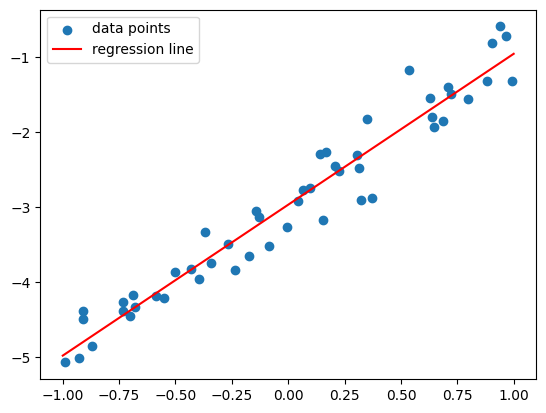

In [400]:
# Scatter plot (data points)
plt.scatter(x,y)

# Plot regression line
x_t = np.linspace(-1,1, num=5)
plt.plot(x_t, regression_formula(x_t, beta1, beta2), c='red')

plt.legend(["data points", "regression line"])

plt.show()

# Q1: Synthetic Teaching

In [401]:
random.seed(8)

# Use the predicted parameter and hypothesis to engineer two features
def create_n_teaching_dp(n, beta1, beta2):
   
    x_ts = np.array([random.uniform(-1, 1) for i in range(n)])
    y_ts = np.array(list(map(lambda x: beta1 + beta2 * x, x_ts)))
    return np.array(list(zip(x_ts,y_ts)))

# Create teaching set n = 2
teaching_set1 = create_n_teaching_dp(2, beta1, beta2)
df = pd.DataFrame(teaching_set1, columns=['x', 'y'])
df

,x,y
0,-0.546588,-4.066443
1,0.924590,-1.109060


### Solve simultanous equations 
$$\hat{{\beta}}=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \mathbf{X}^{\top} \mathbf{y} $$
$$\hat{{\beta}}((\mathbf{X}^{\top} \mathbf{X})^{-1}(\mathbf{X}^{\top}))^{-1}= \mathbf{y} $$

$$ Y = X \hat{\beta} + \hat{U} $$

In [402]:
random.seed(8)

def create_3_teaching_dp_allowing_errors(beta1, beta2): 
    ts = create_n_teaching_dp(2, beta1, beta2)
    print(ts)
    
    # Introduce noise to a data point
    noise = random.uniform(-1, 1)
    ts[1][1] += noise
    
    print(ts)

    temp = 0
    for x, y in (ts):
        temp += (beta2 * x + beta1 - y)
        
    rand_x = random.uniform(-1, 1)
        
    result_y = temp + beta2 * rand_x + beta1
    
    print(result_y)
        
    return np.append(ts, [[rand_x, result_y]], axis=0) 
   
    

# Create teaching set n = 3
teaching_set2 = create_3_teaching_dp_allowing_errors(beta1, beta2)
df = pd.DataFrame(teaching_set2, columns=['x', 'y'])
df

[[-0.54658828 -4.06644288]
 [ 0.92459007 -1.10905952]]
[[-0.54658828 -4.06644288]
 [ 0.92459007 -1.85639772]]
-1.396893545151918


,x,y
0,-0.546588,-4.066443
1,0.924590,-1.856398
2,0.409634,-1.396894


In [403]:
# Check for successful teaching for both synthetic datasets: Compare "a vs \hat{a}", "b vs \hat{b}"
x_ts1, y_ts1 = teaching_set1.T

# Compare learned parameters from teaching set 1 to predicted parameters
beta1_ts1, beta2_ts1 = ols_estimator_1d(x_ts1, y_ts1)

df1 = pd.DataFrame([[beta1, beta2], [beta1_ts1, beta2_ts1]], columns=['$\hat{a}$', '$\hat{b}$'], index=['predicted', 'learned from teaching set'])
display(df1)

x_ts2, y_ts2 = teaching_set2.T
# Compare learned parameters from teaching set 2 to predicted parameters
beta1_ts2, beta2_ts2 = ols_estimator_1d(x_ts2, y_ts2)

df2 = pd.DataFrame([[beta1, beta2], [beta1_ts2, beta2_ts2]], columns=['$\hat{a}$', '$\hat{b}$'], index=['predicted', 'learned from teaching set'])
display(df2)

,$\hat{a}$,$\hat{b}$
predicted,-2.967683,2.010214
learned from teaching set,-2.967683,2.010214


,$\hat{a}$,$\hat{b}$
predicted,-2.967683,2.010214
learned from teaching set,-2.877035,1.664947


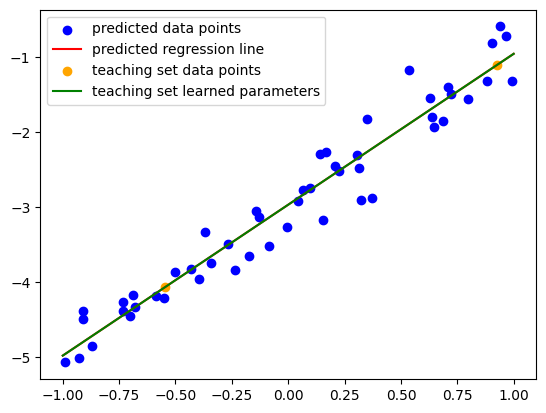

In [404]:
# Overlay the synthetic plot vs predicted plot, and plot the synthetic dataset from teaching set 1

x_t = np.linspace(-1,1, num=5)

# Original data points 
plt.scatter(x, y, c='blue')
plt.plot(x_t, regression_formula(x_t, beta1, beta2), c='red')

# Synthetic teaching set data points
plt.scatter(x_ts1, y_ts1, c='orange')
plt.plot(x_t, regression_formula(x_t, beta1_ts1, beta2_ts1), c='green')

plt.legend(["predicted data points", "predicted regression line", "teaching set data points", "teaching set learned parameters"])

plt.show()


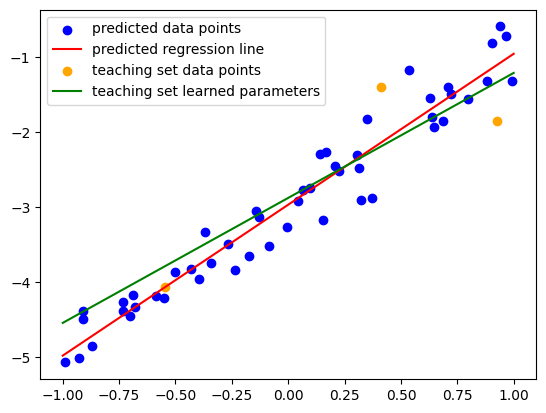

In [405]:
# Overlay the synthetic plot vs predicted plot, and plot the synthetic dataset from teaching set 2

x_t = np.linspace(-1,1, num=5)

# Original data points 
plt.scatter(x, y, c='blue')
plt.plot(x_t, regression_formula(x_t, beta1, beta2), c='red')

# Synthetic teaching set data points
plt.scatter(x_ts2, y_ts2, c='orange')
plt.plot(x_t, regression_formula(x_t, beta1_ts2, beta2_ts2), c='green')

plt.legend(["predicted data points", "predicted regression line", "teaching set data points", "teaching set learned parameters"])

plt.show()

# Q2: Pool-based Teacher

In [406]:
# Read pool of data points from hw3pool.txt

# Define a function called -student that takes in input: pool, P; predicted param; return minimum cost

# Select a subset of data points from pool

In [407]:
# Why is exact teaching infeasible in pool-based teaching?

In [408]:
# Define n number of data points to choose from dataset

In [409]:
# Enumerate dataset and choose all permutation of n data points used as teaching set
# Compute the predicted parameters for each teaching set, D
# Find the predicted parameters that yields the minimum cost (closest) - using "square difference"